In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
from datetime import timedelta
import yfinance as yf
import arch
import statsmodels.api as sm
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
sns.set_style("whitegrid")

plt.rc("figure", figsize=(16, 8))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

In [3]:
tickers = ['^GSPC']
start_date = '2007-01-01'
end_date = '2009-01-01'

data = yf.download(tickers, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [4]:
returns = 100 * data.Close.ffill().pct_change().dropna()

Text(0.5, 1.0, '^GSPC Returns')

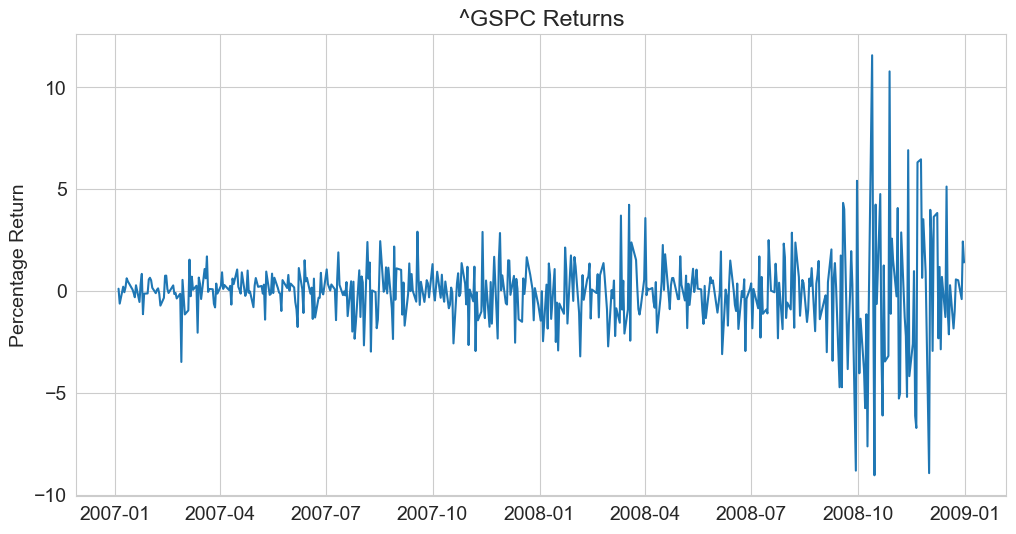

In [5]:
plt.figure(figsize=(12,6))
plt.plot(returns)
plt.ylabel('Percentage Return')
plt.title('^GSPC Returns')

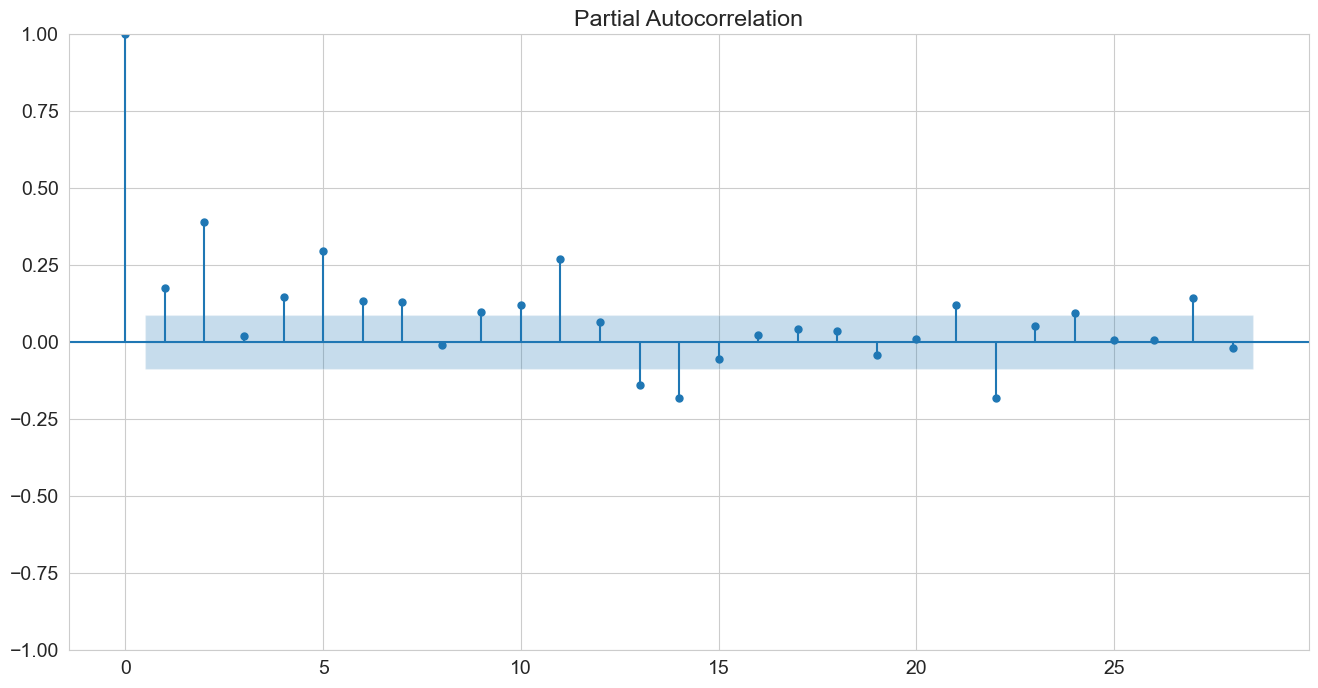

In [6]:
# squares each value in the returns variable
plot_pacf(returns**2)
plt.show()

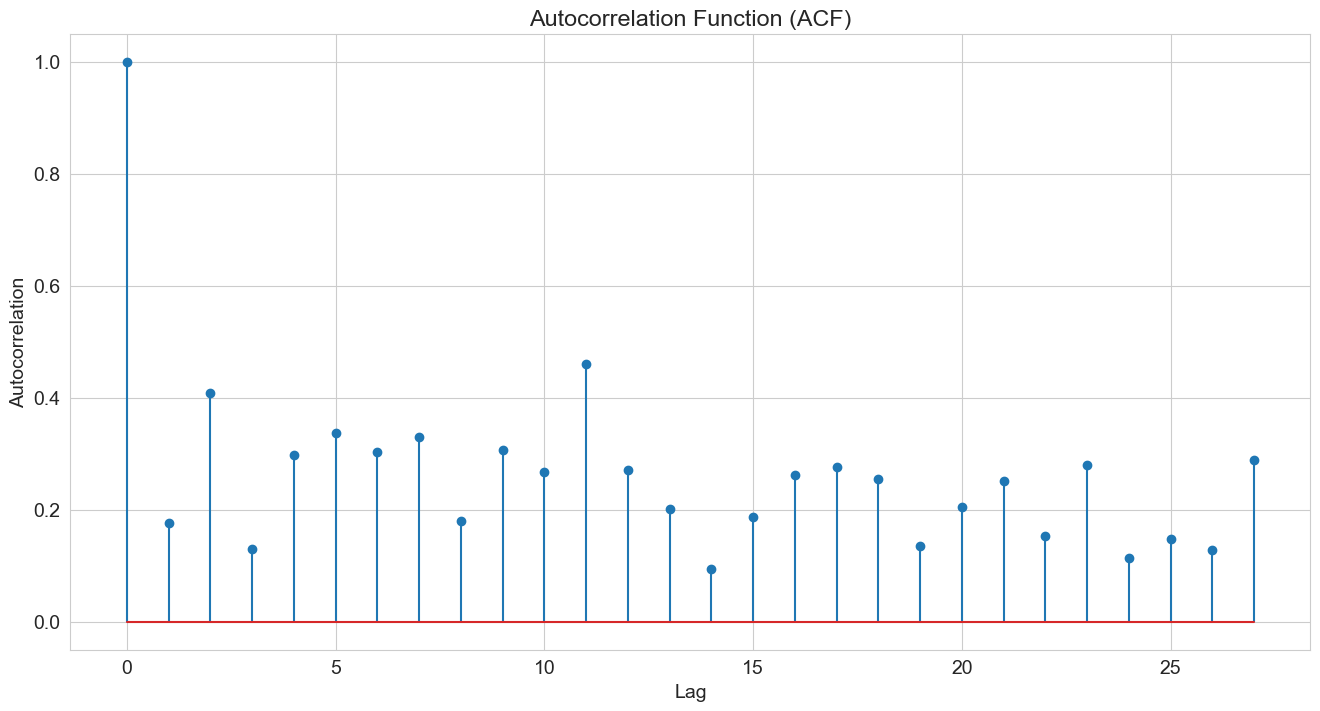

In [7]:
acf_result = sm.tsa.acf(returns**2)

#Plot ACF
plt.stem(acf_result)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [8]:
# Create GARCH-t model
model = arch_model(returns, p=2, q=0, vol='Garch', dist='t')

In [9]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 2701.554230635463
Iteration:      2,   Func. Count:     16,   Neg. LLF: 1753.7068393298373
Iteration:      3,   Func. Count:     23,   Neg. LLF: 1751.6340079605934
Iteration:      4,   Func. Count:     30,   Neg. LLF: 2100.681656136701
Iteration:      5,   Func. Count:     37,   Neg. LLF: 1265.132430885011
Iteration:      6,   Func. Count:     44,   Neg. LLF: 906.790315670528
Iteration:      7,   Func. Count:     50,   Neg. LLF: 902.645579743501
Iteration:      8,   Func. Count:     56,   Neg. LLF: 907.8332650717193
Iteration:      9,   Func. Count:     64,   Neg. LLF: 900.9005674700331
Iteration:     10,   Func. Count:     70,   Neg. LLF: 900.7085089794258
Iteration:     11,   Func. Count:     76,   Neg. LLF: 900.6686013493535
Iteration:     12,   Func. Count:     82,   Neg. LLF: 900.6285631970463
Iteration:     13,   Func. Count:     88,   Neg. LLF: 900.6209578207709
Iteration:     14,   Func. Count:     94,   Neg. LLF: 900.618828

In [10]:
print(model_fit.summary())

                         Constant Mean - ARCH Model Results                         
Dep. Variable:                        Close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                             ARCH   Log-Likelihood:               -900.619
Distribution:      Standardized Student's t   AIC:                           1811.24
Method:                  Maximum Likelihood   BIC:                           1832.34
                                              No. Observations:                  503
Date:                      Sat, Jan 27 2024   Df Residuals:                      502
Time:                              15:25:37   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu     

In [11]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [12]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

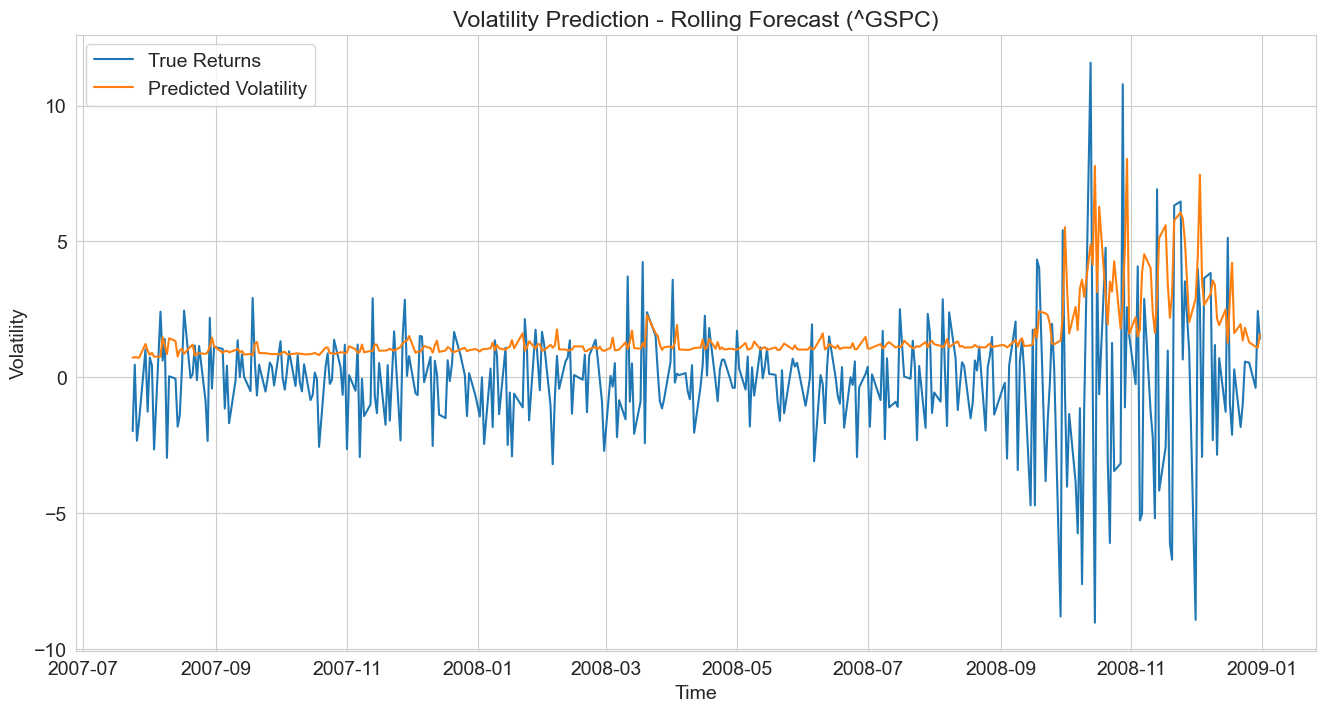

In [13]:
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast (^GSPC)')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend(['True Returns', 'Predicted Volatility'])
plt.savefig('Volatility_Comparison_GSPC.png')